### Task 1: Data evaluation and Regression Model analysis (data_matrix.csv)

#### Load data


In [21]:
import pandas as pd

data = pd.read_csv("C:\\Users\\nagaj\\Music\\Playlists\\Case_study_student (2)\\Case_study_student\\data_matrix.csv", sep=';')
df = pd.DataFrame(data)
df = df.drop('Run', axis = 1)
df.head()

,input_1,input_2,input_3,output_1,output_2
0,0.00,10.0,1.500,-0.24,24.758279
1,2.50,5.0,2.750,-3.70,41.787849
2,-2.50,15.0,0.250,6.18,5.985490
3,-1.25,7.5,2.125,-7.75,37.442063
4,3.75,17.5,-0.375,25.33,4.546249


#### Sensitivity analysis


<Axes: >

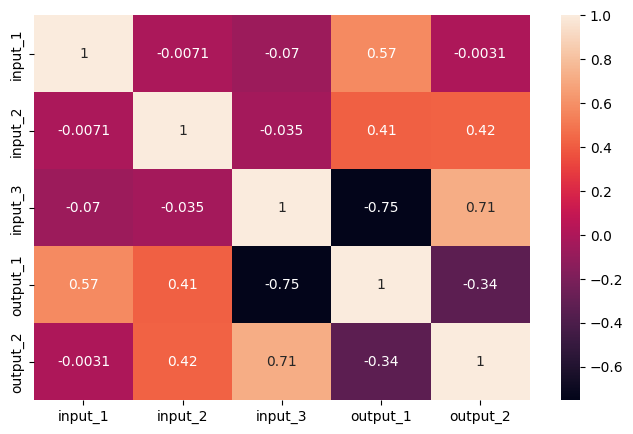

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define figure size
plt.figure(figsize=(8, 5))  # Adjust width and height as needed
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)

#### Assess distribution of output variables


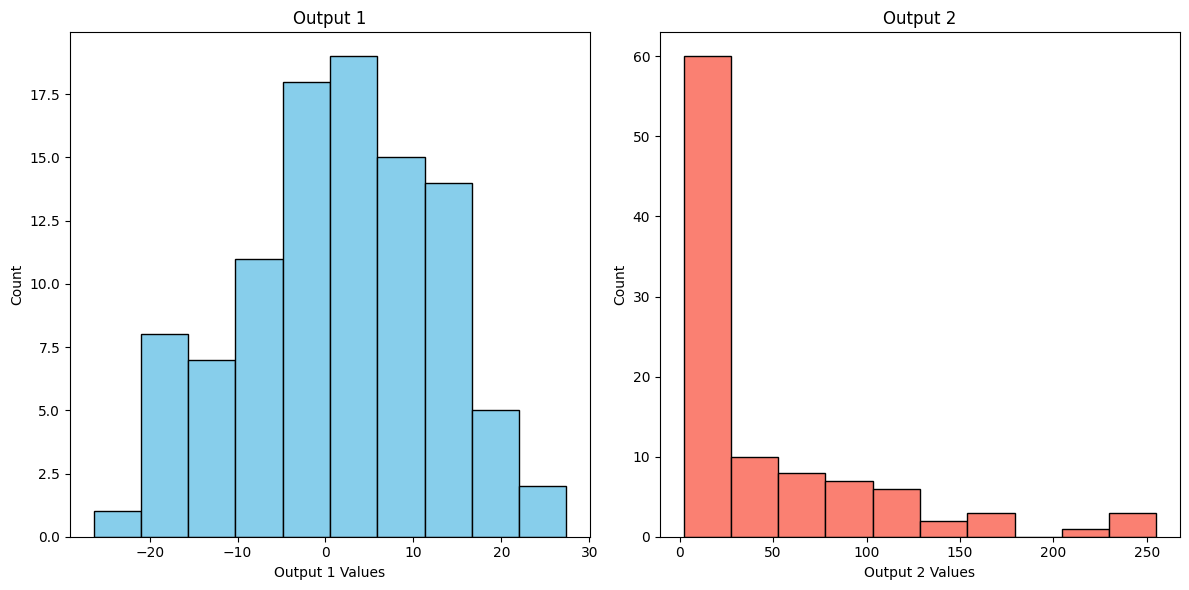

In [11]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for Output 1
axs[0].hist(df["output_1"], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Output 1')
axs[0].set_xlabel('Output 1 Values')
axs[0].set_ylabel('Count')

# Plot histogram for Output 2
axs[1].hist(df["output_2"], bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Output 2')
axs[1].set_xlabel('Output 2 Values')
axs[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### Split data into train and test sets

In [4]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,1:4]
y1 = df['output_1']
y2 = df['output_2']

x_train, x_test, y1_train, y1_test, y2_train, y2_test = train_test_split(x, y1, y2, test_size = 0.2 , random_state = 42)

#### Build  Linear regression & support vector regression models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

lr_output_1 = LinearRegression()
lr_output_1.fit(x_train, y1_train)

lr_output_2 = LinearRegression()
lr_output_2 = lr_output_1.fit(x_train, y2_train)

svr_output_1 = SVR(kernel = 'linear')
svr_output_1.fit(x_train, y1_train)

svr_output_2 = SVR(kernel = 'linear')
svr_output_2.fit(x_train, y2_train)

#### Evaluate regression models of MSE


In [6]:
from sklearn.metrics import mean_squared_error,r2_score

lr_output_1_pred = lr_output_1.predict(x_test)
lr_output_2_pred = lr_output_2.predict(x_test)
svr_output_1_pred = svr_output_1.predict(x_test)
svr_output_2_pred = svr_output_2.predict(x_test)

print('linear regression output_1 mean squared error:', mean_squared_error(y1_test, lr_output_1_pred))
print('linear regression output_2 mean squared error:', mean_squared_error(y2_test, lr_output_2_pred))
print('support vector regression output_1 mean squared error:', mean_squared_error(y1_test, svr_output_1_pred))
print('support vector regression output_2 mean squared error:', mean_squared_error(y1_test, svr_output_2_pred))


linear regression output_1 mean squared error: 3915.676355786971
linear regression output_2 mean squared error: 1073.6944605749077
support vector regression output_1 mean squared error: 0.00281923935082334
support vector regression output_2 mean squared error: 2222.94485021843


#### Evaluate regression models of R2_score


In [7]:
print('linear regression output_1 mean squared error:', r2_score(y1_test, lr_output_1_pred))
print('linear regression output_2 mean squared error:', r2_score(y2_test, lr_output_2_pred))
print('support vector regression output_1 mean squared error:', r2_score(y1_test, svr_output_1_pred))
print('support vector regression output_2 mean squared error:', r2_score(y1_test, svr_output_2_pred))

linear regression output_1 mean squared error: -29.919479971062877
linear regression output_2 mean squared error: 0.6679439868946049
support vector regression output_1 mean squared error: 0.9999777383504863
support vector regression output_2 mean squared error: -16.553110249146812


#### compare models


In [8]:
if mean_squared_error(y1_test, lr_output_1_pred) < mean_squared_error(y1_test, svr_output_1_pred):
    print('Linear regression model for output_1 is better')
else:
    print('Support vector regression model for output_1 is better')
                                                                      
                                                                      
if mean_squared_error(y2_test, lr_output_2_pred) < mean_squared_error(y1_test, svr_output_2_pred):
    print('Linear regression model for output_2 is better')
else:
    print('Support vector regression model for output_2 is better')                                                                    

Support vector regression model for output_1 is better
Linear regression model for output_2 is better


#### Plot predicted vs actual values

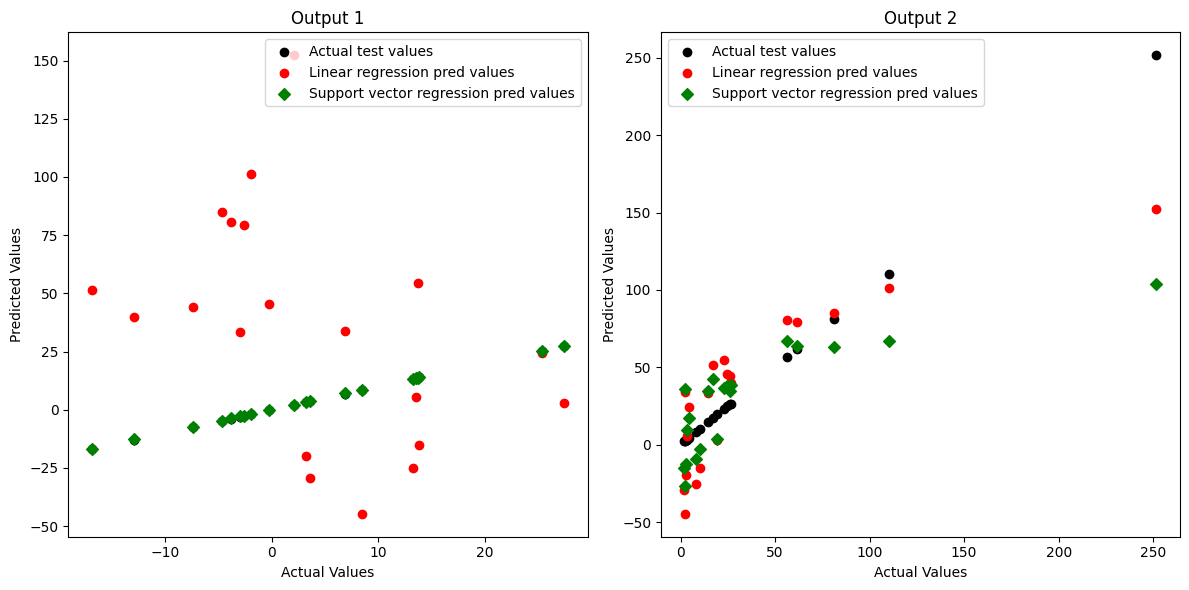

In [20]:
import random

# Amount of noise to add to predicted values
noise = 0.1

# Scatter plot for Output 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y1_test, y1_test, color='black', label='Actual test values')
plt.scatter(y1_test, [val + random.uniform(0, noise) for val in lr_output_1_pred], color='red', marker='o', label='Linear regression pred values')
plt.scatter(y1_test, [val + random.uniform(0, noise) for val in svr_output_1_pred], color='green', marker='D', label='Support vector regression pred values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Output 1')
plt.legend()

# Scatter plot for Output 2
plt.subplot(1, 2, 2)
plt.scatter(y2_test, y2_test, color='black', label='Actual test values')
plt.scatter(y2_test, [val + random.uniform(0, noise) for val in lr_output_2_pred], color='red', marker='o', label='Linear regression pred values')
plt.scatter(y2_test, [val + random.uniform(0, noise) for val in svr_output_2_pred], color='green', marker='D', label='Support vector regression pred values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Output 2')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()